In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/projects 2024/Telco-Customer-Churn.csv")

# **Import and load dataset**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7138,7570-WELNY,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),84.70,5711.05,No
7139,9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No
7140,3407-JMJQQ,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.00,7661.8,No
7141,6248-TKCQV,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.60,5460.2,No


# **Preprocessing steps:**
1.Change object to int64 for numerical columns

2.Check for null values and fill it with mean

3.Check for duplicates and drop them

4.Feature engineering: Adding a columns that provides information for churn

5.Do encoding for categorical columns

6.Check for Correlation and drop columns

7.Do feature scaling for numerical columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7143 entries, 0 to 7142
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7143 non-null   object 
 1   gender            7143 non-null   object 
 2   SeniorCitizen     7143 non-null   int64  
 3   Partner           7143 non-null   object 
 4   Dependents        7143 non-null   object 
 5   tenure            7143 non-null   int64  
 6   PhoneService      7143 non-null   object 
 7   MultipleLines     7143 non-null   object 
 8   InternetService   7143 non-null   object 
 9   OnlineSecurity    7143 non-null   object 
 10  OnlineBackup      7143 non-null   object 
 11  DeviceProtection  7143 non-null   object 
 12  TechSupport       7143 non-null   object 
 13  StreamingTV       7143 non-null   object 
 14  StreamingMovies   7143 non-null   object 
 15  Contract          7143 non-null   object 
 16  PaperlessBilling  7143 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7043,7409-JURKQ,Female,0,Yes,No,53,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),111.80,5809.75,No
7044,8780-IHCRN,Male,0,Yes,Yes,63,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.65,1574.50,No
7045,6257-DTAYD,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.15,7365.30,No
7046,1038-ZAGBI,Female,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,229.60,Yes
7047,3606-SBKRY,Male,0,No,No,31,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,50.05,1523.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7138,7570-WELNY,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),84.70,5711.05,No
7139,9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No
7140,3407-JMJQQ,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.00,7661.80,No
7141,6248-TKCQV,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.60,5460.20,No


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:

# Interaction Feature: Total Amount Paid Over Tenure
df['TotalAmountPaid'] = df['tenure'] * df['MonthlyCharges']

additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df['AdditionalServices'] = df[additional_services].sum(axis=1)

# Customer Tenure Categories
tenure_bins = [0, 12, 24, 36, 48, 60, np.inf]
tenure_labels = ['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5+ years']
df['TenureCategory'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

In [14]:
# Create a new feature 'MonthlyToTotalRatio' by dividing 'MonthlyCharges' by 'TotalCharges'
df['MonthlyToTotalRatio'] = df['MonthlyCharges'] / df['TotalCharges']

In [15]:
# Remove the 'Churn' column
churn_column = df.pop('Churn')

# Insert the 'Churn' column at the end
df['Churn'] = churn_column


In [16]:
df['MonthlyToTotalRatio'].isnull().sum()

0

In [17]:
df['MonthlyToTotalRatio'].replace([np.inf, -np.inf], np.nan).isnull().sum()

0

In [18]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['MonthlyToTotalRatio'].fillna(df['MonthlyToTotalRatio'].mean(), inplace=True)

In [19]:
df['MonthlyToTotalRatio'].replace([np.inf, -np.inf], np.nan).isnull().sum()

0

In [20]:
df.drop(columns=['customerID'],inplace=True)

In [21]:

from sklearn.preprocessing import LabelEncoder
# Specify the columns to encode
columns = ['gender', 'Partner', 'Dependents','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'Contract','PaymentMethod', 'Churn','TenureCategory','AdditionalServices']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

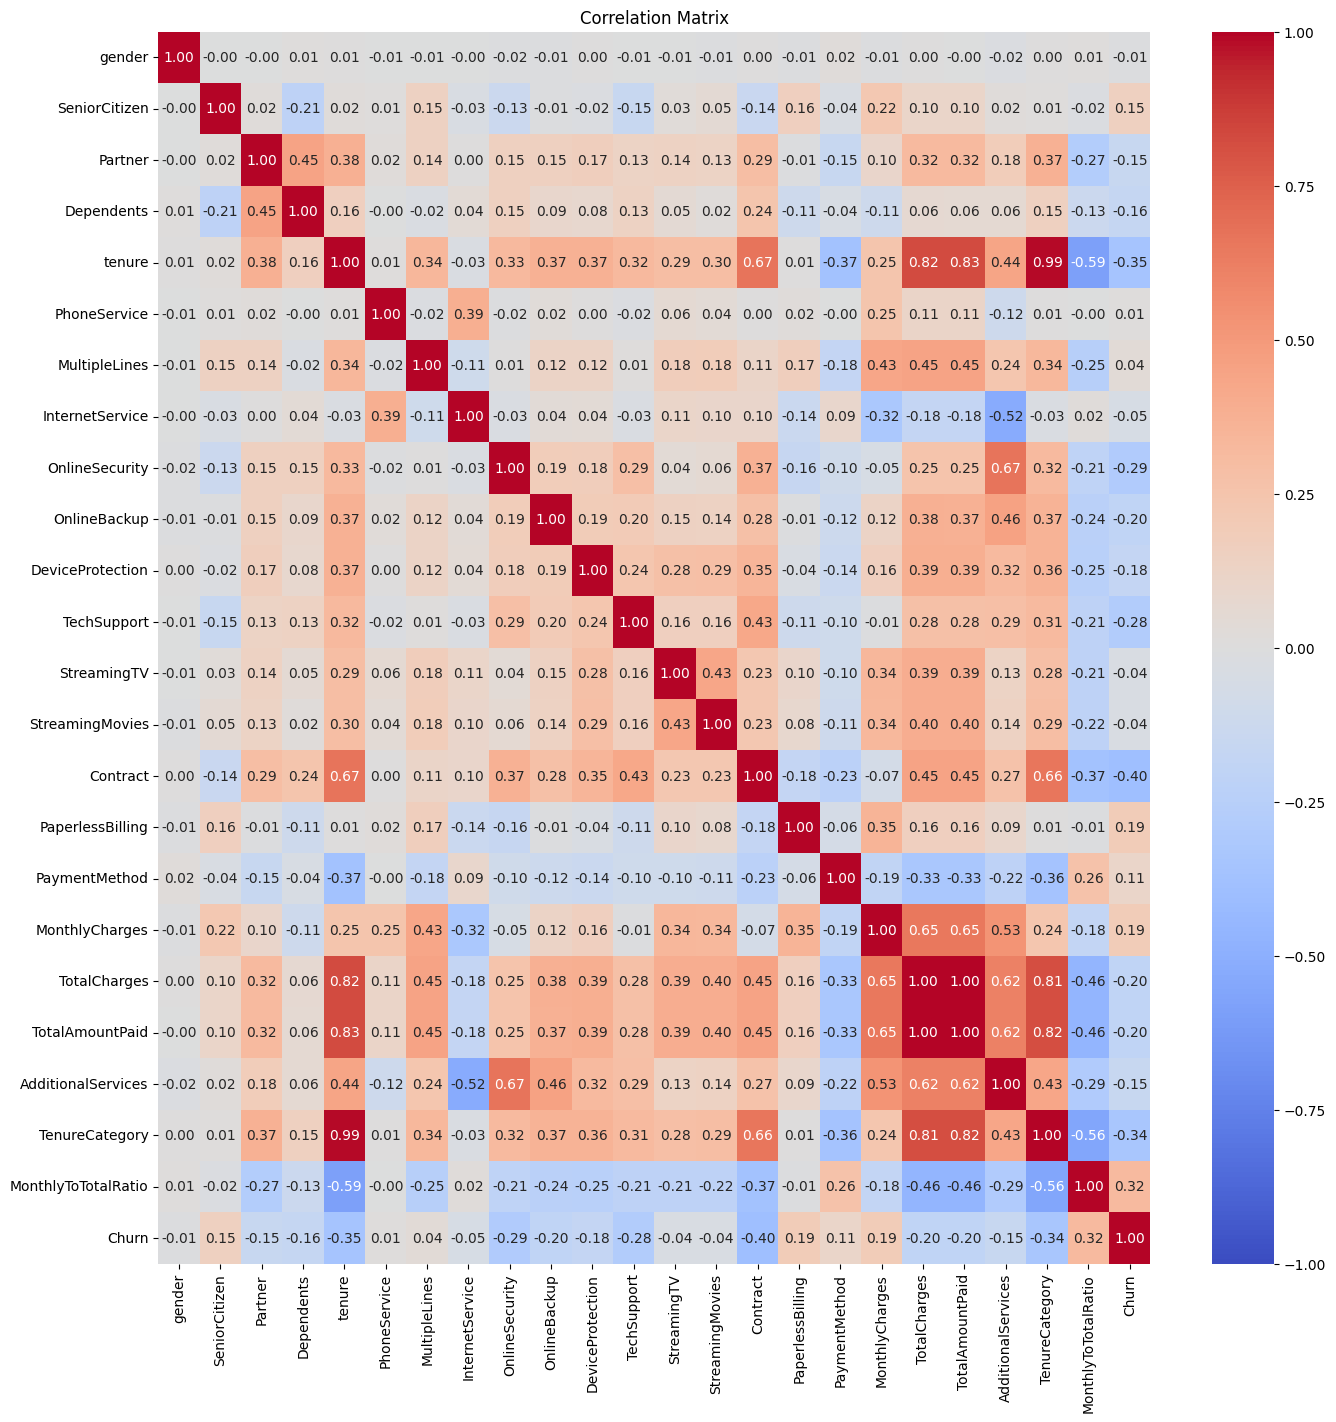

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [23]:
df.drop(columns=['gender','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies'],inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SeniorCitizen        7043 non-null   int64  
 1   Partner              7043 non-null   int64  
 2   Dependents           7043 non-null   int64  
 3   tenure               7043 non-null   int64  
 4   OnlineSecurity       7043 non-null   int64  
 5   OnlineBackup         7043 non-null   int64  
 6   DeviceProtection     7043 non-null   int64  
 7   TechSupport          7043 non-null   int64  
 8   Contract             7043 non-null   int64  
 9   PaperlessBilling     7043 non-null   int64  
 10  PaymentMethod        7043 non-null   int64  
 11  MonthlyCharges       7043 non-null   float64
 12  TotalCharges         7043 non-null   float64
 13  TotalAmountPaid      7043 non-null   float64
 14  AdditionalServices   7043 non-null   int64  
 15  TenureCategory       7043 non-null   int64 

In [25]:
df.isnull().sum()

SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
TotalAmountPaid        0
AdditionalServices     0
TenureCategory         0
MonthlyToTotalRatio    0
Churn                  0
dtype: int64

In [26]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalAmountPaid,AdditionalServices,TenureCategory,MonthlyToTotalRatio,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,29.85,5,0,1.000000,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,1936.30,11,2,0.030140,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,107.70,13,0,0.497920,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,1903.50,12,3,0.022980,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,141.40,1,0,0.466205,1


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns
df[['MonthlyCharges','TotalCharges','TotalAmountPaid','MonthlyToTotalRatio']] = scaler.fit_transform(df[['MonthlyCharges','TotalCharges','TotalAmountPaid','MonthlyToTotalRatio']])


In [28]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalAmountPaid,AdditionalServices,TenureCategory,MonthlyToTotalRatio,Churn
0,0,1,0,1,0,2,0,0,0,1,2,0.115423,0.001275,0.003491,5,0,1.000000,0
1,0,0,0,34,2,0,2,0,1,0,3,0.385075,0.215867,0.226468,11,2,0.021692,0
2,0,0,0,2,2,2,0,0,0,1,3,0.354229,0.010310,0.012596,13,0,0.493546,1
3,0,0,0,45,2,0,2,2,1,0,0,0.239303,0.210241,0.222632,12,3,0.014469,0
4,0,0,0,2,0,0,0,0,0,1,2,0.521891,0.015330,0.016538,1,0,0.461555,1


# **Handling imbalance data using oversampling**

In [29]:
# Count the occurrences of each class in the target variable
class_counts = df['Churn'].value_counts()

# Display the class counts
print(class_counts)


Churn
0    5174
1    1869
Name: count, dtype: int64


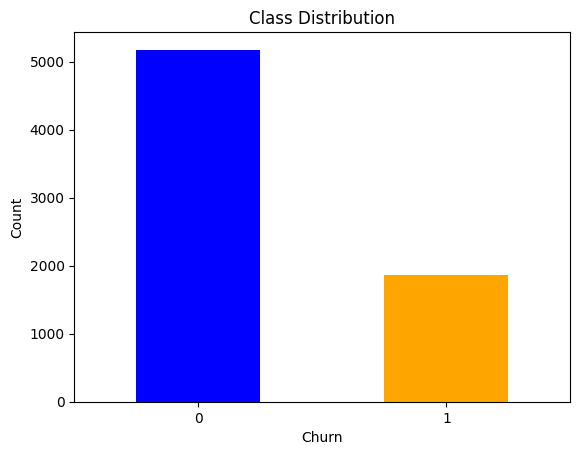

In [30]:
import matplotlib.pyplot as plt

# Plot the class distribution
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()


In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Display class distribution before resampling
print("Class distribution before resampling:", Counter(y))

# Specify the desired number of samples
desired_samples_minority = 4000  # Desired number of samples for the minority class
desired_samples_majority = 4000  # Desired number of samples for the majority class

# Oversample the minority class using SMOTE with the specified number of samples
oversampler = SMOTE(sampling_strategy={1: desired_samples_minority})
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Undersample the majority class using RandomUnderSampler with the specified number of samples
undersampler = RandomUnderSampler(sampling_strategy={0: desired_samples_majority})
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Display class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

# Update the original DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Churn'] = y_resampled
df = df_resampled

# Display the updated DataFrame with limited rows
print("Updated DataFrame shape:", df.shape)


Class distribution before resampling: Counter({0: 5174, 1: 1869})
Class distribution after resampling: Counter({0: 4000, 1: 4000})
Updated DataFrame shape: (8000, 18)


In [32]:
# Check for outliers
from scipy import stats
z_scores = stats.zscore(df.select_dtypes(include=np.number))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Check for errors in data entry or inconsistencies
# You can visually inspect the data or use domain knowledge to identify potential issues
# For example, you can check if numerical columns have unrealistic values or if categorical columns have misspelled categories

In [33]:
df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalAmountPaid,AdditionalServices,TenureCategory,MonthlyToTotalRatio,Churn
0,1,1,1,60,2,2,0,0,0,1,2,0.746269,0.664176,0.654386,13,5,0.007578,0
1,0,1,0,18,0,0,0,0,0,1,2,0.546269,0.148529,0.154000,1,1,0.047790,0
2,0,1,0,71,1,1,1,1,2,1,1,0.061194,0.196931,0.202620,0,5,0.005554,0
3,0,0,0,58,1,1,1,1,2,1,0,0.008955,0.117321,0.129906,0,4,0.009944,0
4,1,1,0,50,2,2,2,0,1,1,0,0.832338,0.605435,0.595906,15,4,0.010810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,1,0,0,0,0,0,0,2,0.509978,0.005851,0.008129,1,0,1.000000,1
7996,0,0,1,1,1,1,1,1,0,0,3,0.010596,0.000059,0.002259,0,0,1.000000,1
7997,0,0,0,3,1,1,1,1,0,0,0,0.023178,0.004024,0.007401,0,0,0.384949,1
7998,0,0,0,21,0,2,2,0,0,1,2,0.717951,0.223389,0.227916,7,1,0.038096,1


# **Train-Test Split**

In [34]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6397, 17) (6397,)
Testing set shape: (1600, 17) (1600,)


# **Model Training and Evaluation:**

Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_model = LogisticRegression(max_iter=100)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC-AUC:", roc_auc)

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


Logistic Regression:
Accuracy: 0.783125
Precision: 0.7480225988700565
Recall: 0.8422391857506362
F1-score: 0.7923399162178336
ROC-AUC: 0.8570202749592064


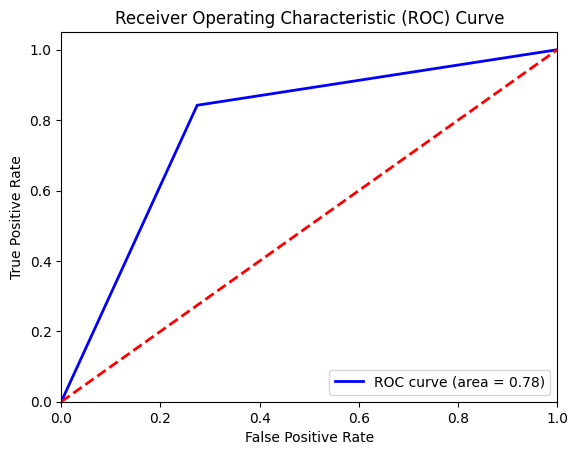

In [37]:

# Evaluate Logistic Regression model
print("Logistic Regression:")
evaluate_model(logistic_model, X_test, y_test)

Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
tree_model = DecisionTreeClassifier(max_depth=5)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)


Decision Tree Classifier:
Accuracy: 0.758125
Precision: 0.7311703360370799
Recall: 0.8027989821882952
F1-score: 0.7653123104912067
ROC-AUC: 0.834775962638558


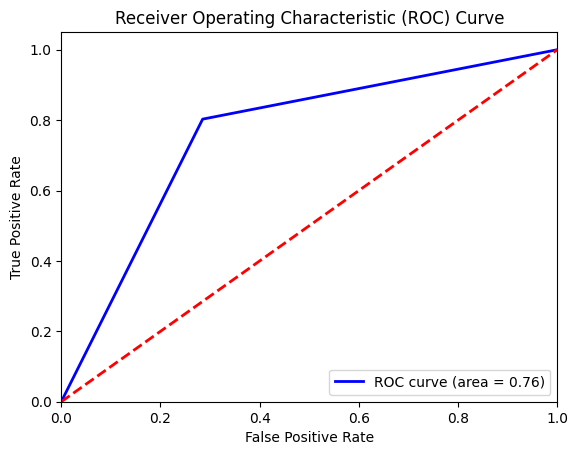

In [39]:
print("Decision Tree Classifier:")
evaluate_model(tree_model, X_test, y_test)

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
forest_model = RandomForestClassifier(n_estimators=100, max_depth=20)

# Train the model
forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = forest_model.predict(X_test)

Random Forest Classifier:
Accuracy: 0.82
Precision: 0.7964285714285714
Recall: 0.851145038167939
F1-score: 0.8228782287822879
ROC-AUC: 0.8900389806878355


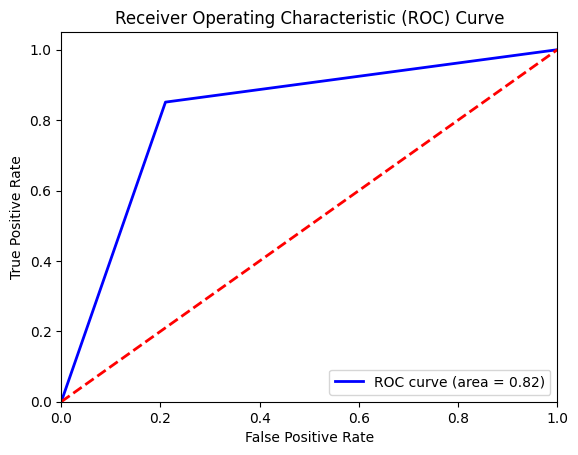

In [46]:
print("Random Forest Classifier:")
evaluate_model(forest_model, X_test, y_test)

Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)


Gradient Boosting Classifier:
Accuracy: 0.80875
Precision: 0.7877697841726619
Recall: 0.8358778625954199
F1-score: 0.8111111111111111
ROC-AUC: 0.8841473326206152


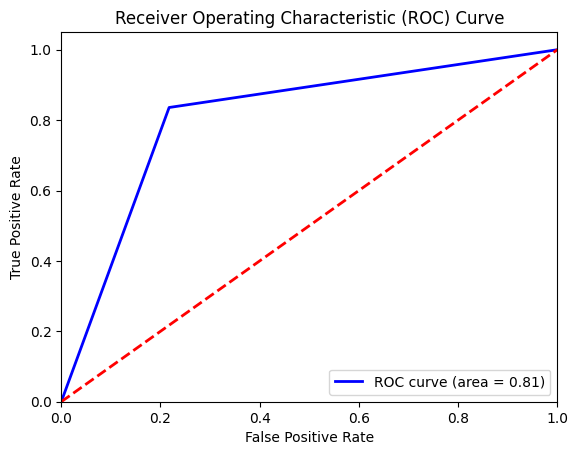

In [48]:
print("Gradient Boosting Classifier:")
evaluate_model(gb_model, X_test, y_test)

Support Vector Machine

In [61]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='rbf', C=1.0,probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

Support Vector Machine:
Accuracy: 0.755625
Precision: 0.7221597300337458
Recall: 0.816793893129771
F1-score: 0.7665671641791045
ROC-AUC: 0.8389413007733618


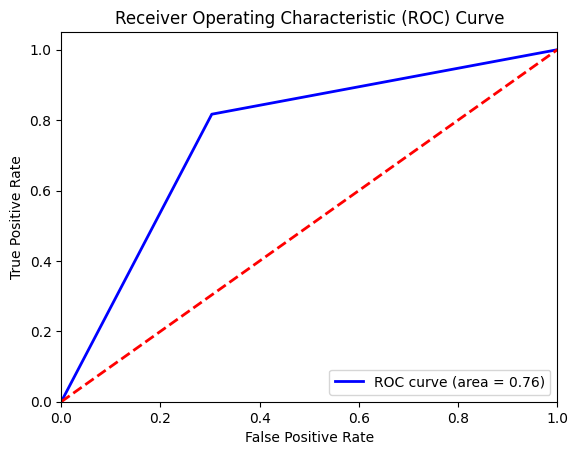

In [62]:
print("Support Vector Machine:")
evaluate_model(svm_model, X_test, y_test)

Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
# Define prior probabilities for each class
priors = [0.3, 0.7]  # Example values, representing two classes

# Create Naive Bayes classifier with specified priors
naive_bayes_model = GaussianNB(priors=priors)

# Train the model
naive_bayes_model.fit(X_train, y_train)


GaussianNB(priors=[0.3, 0.7])

Naive Bayes model:
Accuracy: 0.75625
Precision: 0.7152173913043478
Recall: 0.8371501272264631
F1-score: 0.7713950762016413
ROC-AUC: 0.8249604566398459


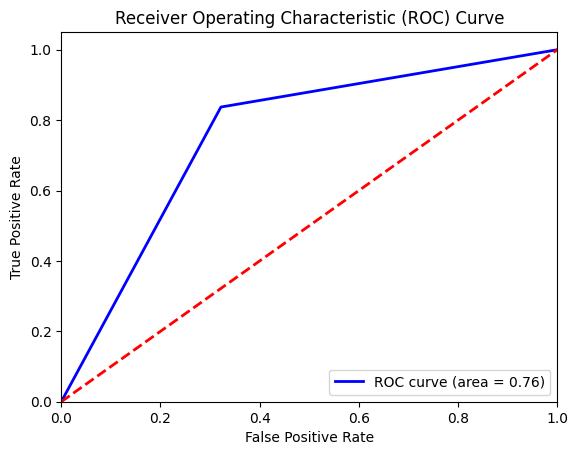

In [52]:
print("Naive Bayes model:")
evaluate_model(naive_bayes_model, X_test, y_test)

Voting Classifier

Accuracy: 0.81875
Precision: 0.7938388625592417
Recall: 0.8524173027989822
F1-score: 0.8220858895705522
ROC-AUC: 0.8891668385943194


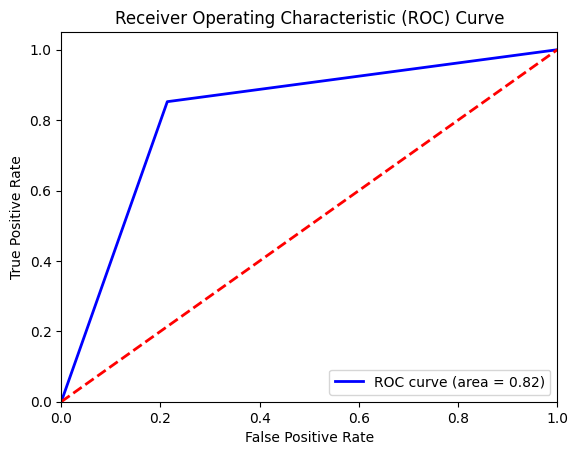

In [58]:
from sklearn.ensemble import VotingClassifier

# Initialize the voting classifier
voting_clf = VotingClassifier(estimators=[('rf', forest_model), ('gb', gb_model)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
evaluate_model(voting_clf, X_test, y_test)


In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Initialize meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Initialize StackingClassifier
stacking_model = StackingClassifier(estimators=[('rf', forest_model), ('gb', gb_model)], final_estimator=logistic_model)

# Train StackingClassifier
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=20)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=10))],
                   final_estimator=LogisticRegression())

Accuracy: 0.818125
Precision: 0.7992744860943168
Recall: 0.8409669211195929
F1-score: 0.8195908245505271
ROC-AUC: 0.889220761358166


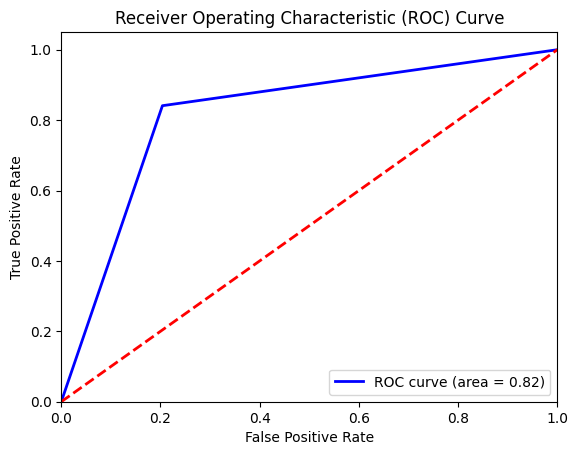

Accuracy of StackingClassifier: None


In [72]:
# Evaluate StackingClassifier
accuracy_stacking = evaluate_model(stacking_model,X_test, y_test)
print("Accuracy of StackingClassifier:", accuracy_stacking)

In [80]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingCVClassifier

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(n_estimators=100))
]

# Initialize meta-classifier
meta_classifier = LogisticRegression()

# Initialize StackingCVClassifier
stacking_cv_model = StackingCVClassifier(classifiers=[clf for _, clf in base_classifiers],
                                         meta_classifier=meta_classifier,
                                         cv=5,  # 5-fold cross-validation
                                         use_probas=True,  # Use predict_proba for stacking
                                         verbose=2)  # Verbose mode for logging

# Fit StackingCVClassifier
stacking_cv_model.fit(X_train, y_train)


Fitting 2 classifiers...
Fitting classifier1: randomforestclassifier (1/2)
RandomForestClassifier()
Fitting classifier2: gradientboostingclassifier (2/2)
GradientBoostingClassifier()


StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  GradientBoostingClassifier()],
                     cv=5, meta_classifier=LogisticRegression(),
                     use_probas=True, verbose=2)

Accuracy: 0.818125
Precision: 0.8007290400972054
Recall: 0.8384223918575063
F1-score: 0.8191423244251088
ROC-AUC: 0.89106507617958


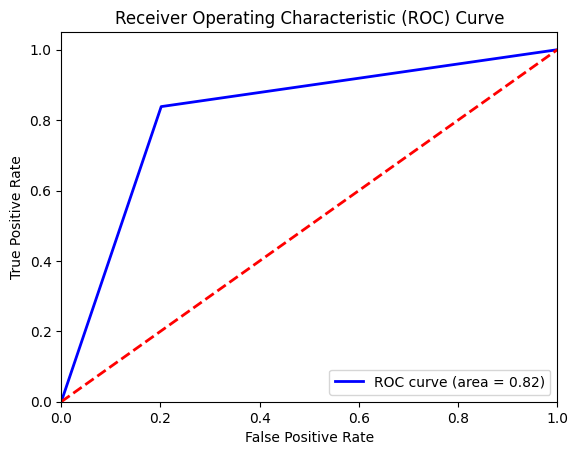

In [82]:
evaluate_model(stacking_cv_model,X_test, y_test)

Long-short term memory

In [ ]:
def evaluate_nnmodel(model, X_test, y_test):
    # Predict probabilities on the test set
    y_prob = model.predict(X_test)

    # Convert probabilities to binary predictions
    y_pred = (y_prob > 0.5).astype(int)

    # Calculate accuracy, precision, recall, F1-score, and ROC-AUC
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC-AUC:", roc_auc)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model architecture
def create_lstm_model(input_shape, lstm_units=64, dropout_rate=0.2):
    model = Sequential([
        LSTM(lstm_units, input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

import numpy as np

# Convert DataFrame to numpy array
X_train_array = X_train.values

# Reshape input data for LSTM
X_train_lstm = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)


# Create LSTM model
lstm_model = create_lstm_model(input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

LSTM model:
50/50 [==============================] - 1s 5ms/step
Accuracy: 0.7685478757133798
Precision: 0.7089627391742196
Recall: 0.9025641025641026
F1-score: 0.7941342357586013
ROC-AUC: 0.8513616768008236


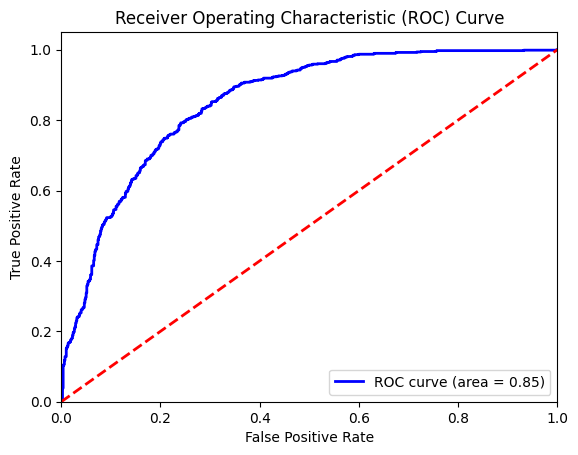

In [ ]:
print("LSTM model:")
evaluate_nnmodel(lstm_model, X_test, y_test)

DNN

In [ ]:
import tensorflow as tf
# Define the DNN model architecture
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
198/198 [==============================] - 2s 6ms/step - loss: 0.5385 - accuracy: 0.7327 - val_loss: 0.5072 - val_accuracy: 0.7584
Epoch 2/10
198/198 [==============================] - 1s 5ms/step - loss: 0.4891 - accuracy: 0.7631 - val_loss: 0.5569 - val_accuracy: 0.7349
Epoch 3/10
198/198 [==============================] - 1s 5ms/step - loss: 0.4839 - accuracy: 0.7742 - val_loss: 0.5250 - val_accuracy: 0.7552
Epoch 4/10
198/198 [==============================] - 1s 3ms/step - loss: 0.4734 - accuracy: 0.7780 - val_loss: 0.4599 - val_accuracy: 0.7800
Epoch 5/10
198/198 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.7780 - val_loss: 0.4501 - val_accuracy: 0.7876
Epoch 6/10
198/198 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7839 - val_loss: 0.4653 - val_accuracy: 0.7876
Epoch 7/10
198/198 [==============================] - 1s 3ms/step - loss: 0.4604 - accuracy: 0.7785 - val_loss: 0.4550 - val_accuracy: 0.7907
Epoch 

Deep Neural Network:
50/50 [==============================] - 0s 2ms/step
Accuracy: 0.7831325301204819
Precision: 0.7390829694323144
Recall: 0.867948717948718
F1-score: 0.7983490566037736
ROC-AUC: 0.8661784576778302


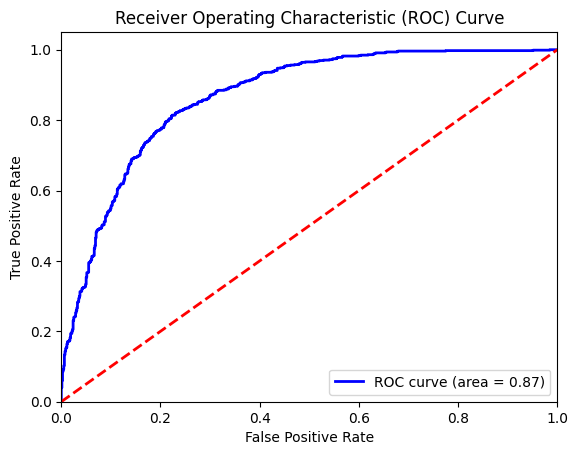

In [ ]:
# Evaluate the DNN model
print("Deep Neural Network:")
evaluate_nnmodel(dnn_model, X_test, y_test)

Gated Recurrent Network

In [ ]:
import tensorflow as tf

# Convert DataFrame to numpy array
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape X_train and X_test for GRU model (assuming sequential data)
X_train_gru = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_gru = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Define the GRU model architecture and compile it
def create_gru_model(units, dropout, learning_rate):
    gru_model = tf.keras.Sequential([
        tf.keras.layers.GRU(units, return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
        tf.keras.layers.GRU(units, return_sequences=True, dropout=dropout),
        tf.keras.layers.GRU(units, dropout=dropout),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    gru_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return gru_model

# Initialize the GRU model with specified hyperparameters
gru_model = create_gru_model(units=64, dropout=0.2, learning_rate=0.001)

# Train the GRU model
gru_model.fit(X_train_gru, y_train, epochs=10, batch_size=32, validation_data=(X_test_gru, y_test))


Epoch 1/10
198/198 [==============================] - 17s 52ms/step - loss: 0.5788 - accuracy: 0.6854 - val_loss: 0.5102 - val_accuracy: 0.7540
Epoch 2/10
198/198 [==============================] - 8s 40ms/step - loss: 0.5085 - accuracy: 0.7544 - val_loss: 0.4830 - val_accuracy: 0.7679
Epoch 3/10
198/198 [==============================] - 9s 45ms/step - loss: 0.4941 - accuracy: 0.7664 - val_loss: 0.4758 - val_accuracy: 0.7660
Epoch 4/10
198/198 [==============================] - 9s 48ms/step - loss: 0.4871 - accuracy: 0.7679 - val_loss: 0.4996 - val_accuracy: 0.7571
Epoch 5/10
198/198 [==============================] - 8s 41ms/step - loss: 0.4868 - accuracy: 0.7693 - val_loss: 0.4732 - val_accuracy: 0.7781
Epoch 6/10
198/198 [==============================] - 9s 45ms/step - loss: 0.4781 - accuracy: 0.7730 - val_loss: 0.4634 - val_accuracy: 0.7838
Epoch 7/10
198/198 [==============================] - 7s 36ms/step - loss: 0.4762 - accuracy: 0.7768 - val_loss: 0.4643 - val_accuracy: 0.780

Gated Recurrent Networks:
50/50 [==============================] - 2s 9ms/step
Accuracy: 0.7888395688015218
Precision: 0.7469613259668508
Recall: 0.8666666666666667
F1-score: 0.8023738872403561
ROC-AUC: 0.8641725380433035


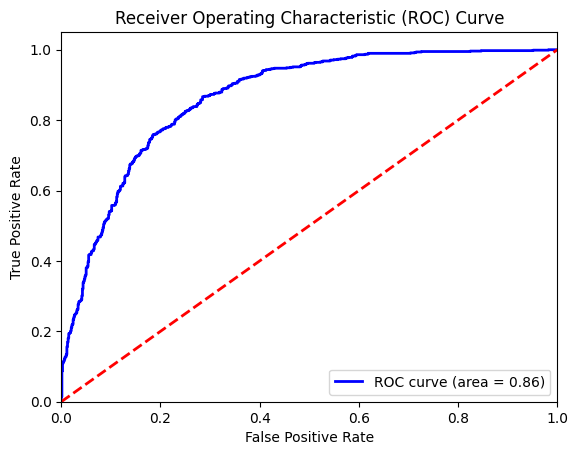

In [ ]:
# Evaluate the DNN model
print("Gated Recurrent Networks:")
evaluate_nnmodel(gru_model, X_test, y_test)


In [ ]:
def evaluate_nnmodel_acc(model, X_test, y_test):
    # Predict probabilities on the test set
    y_prob = model.predict(X_test)

    # Convert probabilities to binary predictions
    y_pred = (y_prob > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))

# Decision Tree
tree_accuracy = accuracy_score(y_test, tree_model.predict(X_test))

# Random Forest
forest_accuracy = accuracy_score(y_test, forest_model.predict(X_test))

# Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_model.predict(X_test))

# Support Vector Machine
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

# Naive Bayes
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_model.predict(X_test))

voting_classifier_accuracy= accuracy_score(y_test,voting_clf.predict(X_test))
# LSTM
lstm_accuracy = evaluate_nnmodel_acc(lstm_model, X_test, y_test)

# Deep Neural Network (DNN)
dnn_accuracy = evaluate_nnmodel_acc(dnn_model, X_test, y_test)

# Gated Recurrent Network (GRU)
gru_accuracy = evaluate_nnmodel_acc(gru_model, X_test, y_test)

# Print the accuracies of each model
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)
print("Random Forest Accuracy:", forest_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)
print("Voting Classifier Accuracy",voting_classifier_accuracy)
print("LSTM Accuracy:", lstm_accuracy)
print("Deep Neural Network (DNN) Accuracy:", dnn_accuracy)
print("Gated Recurrent Network (GRU) Accuracy:", gru_accuracy)


50/50 [==============================] - 0s 10ms/step
Logistic Regression Accuracy: 0.7913760304375397
Decision Tree Accuracy: 0.7863031071655041
Random Forest Accuracy: 0.823715916296766
Gradient Boosting Accuracy: 0.8103994927076728
Support Vector Machine Accuracy: 0.7666455294863666
Naive Bayes Accuracy: 0.7641090678503487
Voting Classifier Accuracy 0.8116677235256817
LSTM Accuracy: 0.7685478757133798
Deep Neural Network (DNN) Accuracy: 0.7831325301204819
Gated Recurrent Network (GRU) Accuracy: 0.7888395688015218


# **Hyperparameter-Tuning**

In [ ]:
# Define expanded hyperparameter grids for Random Forest and Gradient Boosting
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001,0.01, 0.1],
    'max_depth': [3,10,15,20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Increase the number of iterations for RandomizedSearchCV
n_iter_rf = 10
n_iter_gb = 10

# Initialize RandomizedSearchCV with expanded parameter grids and iterations
rf_random_search = RandomizedSearchCV(estimator=forest_model, param_distributions=rf_param_grid, n_iter=n_iter_rf, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
gb_random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_param_grid, n_iter=n_iter_gb, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform RandomizedSearchCV for Random Forest
rf_random_search.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_random_search.best_params_)
print("Random Forest Best Accuracy:", rf_random_search.best_score_)

# Perform RandomizedSearchCV for Gradient Boosting
gb_random_search.fit(X_train, y_train)
print("Gradient Boosting Best Parameters:", gb_random_search.best_params_)
print("Gradient Boosting Best Accuracy:", gb_random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Random Forest Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Random Forest Best Accuracy: 0.8079930525794561
Gradient Boosting Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'learning_rate': 0.001}
Gradient Boosting Best Accuracy: 0.8086269670010091


# **Prediction of new data**

In [103]:
X.iloc[0].shape

(17,)

In [104]:
X.iloc[0].values.reshape(1,-1).shape

(1, 17)

In [109]:
forest_model.predict(X.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [106]:
X.iloc[0]

SeniorCitizen           1.000000
Partner                 1.000000
Dependents              1.000000
tenure                 60.000000
OnlineSecurity          2.000000
OnlineBackup            2.000000
DeviceProtection        0.000000
TechSupport             0.000000
Contract                0.000000
PaperlessBilling        1.000000
PaymentMethod           2.000000
MonthlyCharges          0.746269
TotalCharges            0.664176
TotalAmountPaid         0.654386
AdditionalServices     13.000000
TenureCategory          5.000000
MonthlyToTotalRatio     0.007578
Name: 0, dtype: float64

# **Pickling the model for deployment**

In [111]:
import pickle

In [112]:
pickle.dump(forest_model,open('ranforest.pkl','wb'))

In [113]:
pickled_model=pickle.load(open('ranforest.pkl','rb'))

In [114]:
pickled_model.predict(X.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])